In [1]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 

In [2]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

### 直方图

![title](hist_1.png)

#### cv2.calcHist(images,channels,mask,histSize,ranges)

- images: 原图像图像格式为 uint8 或 ﬂoat32。当传入函数时应 用中括号 [] 括来例如[img]
- channels: 同样用中括号括来它会告函数我们统幅图 像的直方图。如果入图像是灰度图它的值就是 [0]如果是彩色图像 的传入的参数可以是 [0][1][2] 它们分别对应着 BGR。 
- mask: 掩模图像。统整幅图像的直方图就把它为 None。但是如 果你想统图像某一分的直方图的你就制作一个掩模图像并 使用它。
- histSize:BIN 的数目。也应用中括号括来
- ranges: 像素值范围常为 [0-256]

In [3]:
img = cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch08\cat.jpg',0) #0表示灰度图
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist.shape

(256, 1)

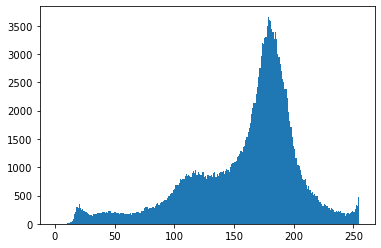

In [4]:
plt.hist(img.ravel(),256); 
plt.show()

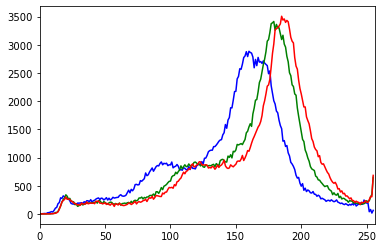

In [5]:
img = cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch08\cat.jpg') 
color = ('b','g','r')
for i,col in enumerate(color): 
    histr = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.plot(histr,color = col) 
    plt.xlim([0,256]) 


mask操作

In [7]:
# 创建mast
mask = np.zeros(img.shape[:2], np.uint8)
print (mask.shape)
# 需要保存什么就把值设为255
mask[100:300, 100:400] = 255
cv_show(mask,'mask')

(414, 500)


In [8]:
img = cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch08\cat.jpg', 0)
cv_show(img,'img')

In [9]:
# 像素与操作
masked_img = cv2.bitwise_and(img, img, mask=mask)#与操作
cv_show(masked_img,'masked_img')

In [10]:
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

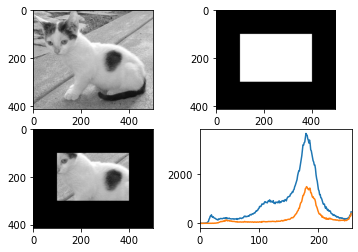

In [11]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

#### 直方图均衡化

![title](hist_2.png)

![title](hist_3.png)

![title](hist_4.png)

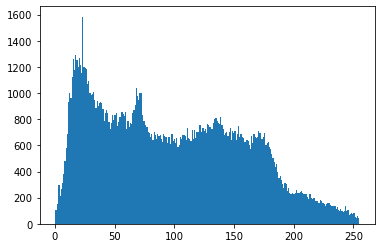

In [12]:
img = cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch08\clahe.jpg',0) #0表示灰度图 #clahe
plt.hist(img.ravel(),256); 
plt.show()

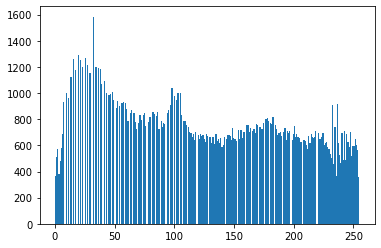

In [13]:
# 图像全局均衡化
# 局部明暗对比强烈时做全局图像均衡化会丢失细节
equ = cv2.equalizeHist(img) 
plt.hist(equ.ravel(),256)
plt.show()


In [14]:
res = np.hstack((img,equ))
cv_show(res,'res')

#### 自适应直方图均衡化

In [17]:
# 图像全局均衡化
# 创建局部特征定义
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# 将局部特征定义应用至图像
res_clahe = clahe.apply(img)
res = np.hstack((img,equ,res_clahe))
cv_show(res,'res')

### 模板匹配


模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与（图像被模板覆盖的地方）的差别程度，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。假如原图形是AxB大小，而模板是axb大小，则输出结果的矩阵是(A-a+1)x(B-b+1)

In [9]:
# 模板匹配
img = cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch08\lena.jpg', 0)
template = cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch08\face.jpg', 0)
h, w = template.shape[:2] 

In [10]:
img.shape

(263, 263)

In [21]:
template.shape

(110, 85)

- TM_SQDIFF：计算平方不同，计算出来的值越小，越相关        
- TM_CCORR：计算相关性，计算出来的值越大，越相关
- TM_CCOEFF：计算相关系数，计算出来的值越大，越相关
- TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关
- TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关
- TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关

（建议使用带归一化的函数，结果更可靠）



公式：https://docs.opencv.org/3.3.1/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d

In [11]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [12]:
# 进行模板匹配
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
res.shape

(154, 179)

In [14]:
# minMaxLoc 自动或取匹配后的相关函数矩阵结果（用来评估匹配结果）
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [25]:
min_val

39168.0

In [26]:
max_val

74403584.0

In [27]:
min_loc

(107, 89)

In [28]:
max_loc

(159, 62)

4


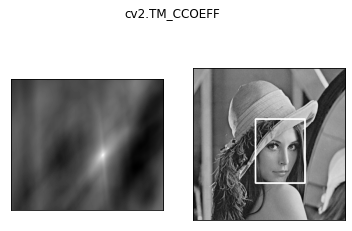

5


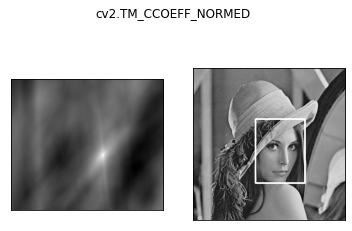

2


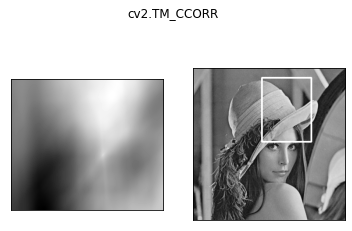

3


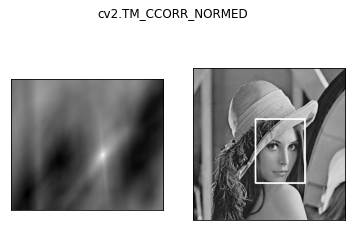

0


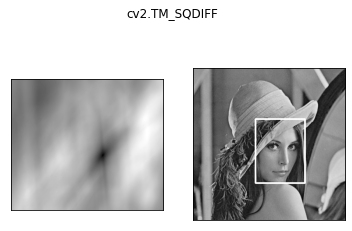

1


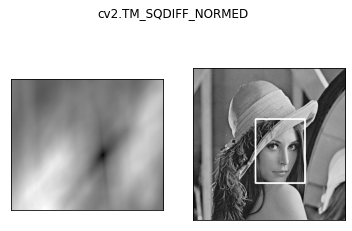

In [15]:
for meth in methods:
    img2 = img.copy()

    # 匹配方法的真值
    method = eval(meth)
    print (method)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # 如果是平方差匹配TM_SQDIFF或归一化平方差匹配TM_SQDIFF_NORMED，取最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # 画矩形
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

### 匹配多个对象

In [17]:
img_rgb = cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch08\mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch08\mario_coin.jpg', 0)
h, w = template.shape[:2]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
# 取匹配程度大于%80的坐标
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):  # *号表示可选参数
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0, 0, 255), 2)

cv2.imshow('img_rgb', img_rgb)
cv2.waitKey(0)

-1